In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import r2_score
import itertools

%matplotlib inline

In [2]:
PATH = "/media/gufran/GsHDD/Work/Projects/AI/PSP/Data/ClassificationData/"

In [3]:
dfz3 = pd.read_csv(PATH+'/dataz3.csv')
dfz3.drop(['imgpath'], axis=1, inplace=True)

In [4]:
dfz3.head()

,height,width,area,pothole_area,nonpothole_area
0,225,290,65250,39803,25447
1,222,301,66822,41166,25656
2,209,317,66253,39794,26459
3,210,300,63000,38570,24430
4,185,282,52170,32183,19987


In [5]:
dfz3.shape

(930, 5)

In [6]:
x3 = dfz3.iloc[:,1:]

x3.head()

,width,area,pothole_area,nonpothole_area
0,290,65250,39803,25447
1,301,66822,41166,25656
2,317,66253,39794,26459
3,300,63000,38570,24430
4,282,52170,32183,19987


### Elbow method

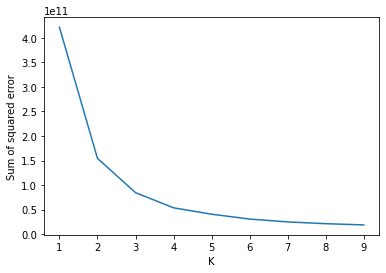

In [43]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfz3)
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Clustering

In [52]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++')
classes3 = kmeans3.fit_predict(x3)
dfz3["cluster"] = kmeans3.fit_predict(dfz3)

In [53]:
x3 = dfz3.iloc[:,:-1].values
y3 = dfz3.iloc[:,-1]

In [54]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.4, random_state = 1)

In [55]:
print(x_train3.shape)
print(x_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(558, 5)
(372, 5)
(558,)
(372,)


In [56]:
sc = StandardScaler()
x_train3 = sc.fit_transform(x_train3)
x_test3 = sc.transform(x_test3)

In [57]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

### Building classifier based on KMeans clustering

In [58]:
lr_classifier3 = LogisticRegression()
knn_classifier3 = KNeighborsClassifier(n_neighbors = 5,p=2,metric = "minkowski")
svm_classifier3 = SVC(kernel = 'linear')
k_svm_classifier3 = SVC(kernel = 'rbf')
nb_classifier3 = GaussianNB()
dt_classifier3 = DecisionTreeClassifier(criterion = 'entropy')
rf_classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

lr_classifier3.fit(x_train3, y_train3)
knn_classifier3.fit(x_train3, y_train3)
svm_classifier3.fit(x_train3, y_train3)
k_svm_classifier3.fit(x_train3, y_train3)
nb_classifier3.fit(x_train3, y_train3)
dt_classifier3.fit(x_train3, y_train3)
rf_classifier3.fit(x_train3, y_train3)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Logistic Regression Z3
Confusion matrix, without normalization
[[225   0   1]
 [  0  25   2]
 [  5   1 113]]
Accuracy =  0.9758064516129032


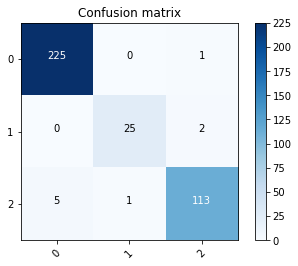

In [59]:
print("Logistic Regression Z3")
y_pred31 = lr_classifier3.predict(x_test3)

cm = confusion_matrix(y_test3, y_pred31)
labels = ['0', '1', '2']

plot_confusion_matrix(cm, classes = labels)

print('Accuracy = ', accuracy_score(y_test3, y_pred31))

KNN Z3
Confusion matrix, without normalization
[[225   0   1]
 [  0  25   2]
 [  4   1 114]]
Accuracy =  0.978494623655914


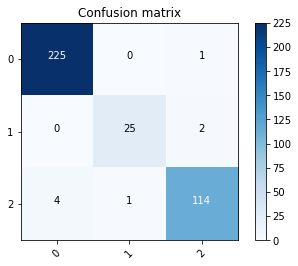

In [60]:
print("KNN Z3")
y_pred32 = knn_classifier3.predict(x_test3)

cm = confusion_matrix(y_test3, y_pred32)
labels = ['0', '1', '2']

plot_confusion_matrix(cm, classes = labels)

print('Accuracy = ', accuracy_score(y_test3, y_pred32))

SVM Z3
Confusion matrix, without normalization
[[225   0   1]
 [  0  25   2]
 [  4   1 114]]
Accuracy =  0.978494623655914


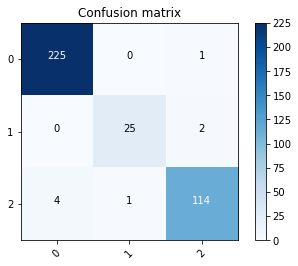

In [61]:
print("SVM Z3")
y_pred33 = svm_classifier3.predict(x_test3)

cm = confusion_matrix(y_test3, y_pred32)
labels = ['0', '1', '2']

plot_confusion_matrix(cm, classes = labels)

print('Accuracy = ', accuracy_score(y_test3, y_pred32))

RBF-SVM Z3
Confusion matrix, without normalization
[[226   0   0]
 [  0  25   2]
 [  4   0 115]]
Accuracy =  0.9838709677419355


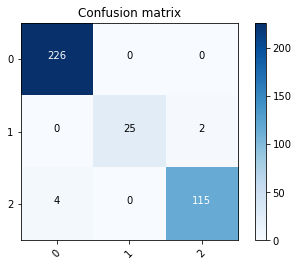

In [62]:
print("RBF-SVM Z3")
y_pred34 = k_svm_classifier3.predict(x_test3)

cm = confusion_matrix(y_test3, y_pred34)
labels = ['0', '1', '2']

plot_confusion_matrix(cm, classes = labels)

print('Accuracy = ', accuracy_score(y_test3, y_pred34))

Naive Bayes Z3
Confusion matrix, without normalization
[[223   0   3]
 [  0  27   0]
 [  1   4 114]]
Accuracy =  0.978494623655914


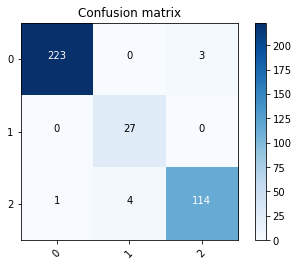

In [63]:
print("Naive Bayes Z3")
y_pred35 = nb_classifier3.predict(x_test3)

cm = confusion_matrix(y_test3, y_pred35)
labels = ['0', '1', '2']

plot_confusion_matrix(cm, classes = labels)

print('Accuracy = ', accuracy_score(y_test3, y_pred35))

Decision Tree Z3
Confusion matrix, without normalization
[[223   0   3]
 [  0  27   0]
 [  0   1 118]]
Accuracy =  0.989247311827957


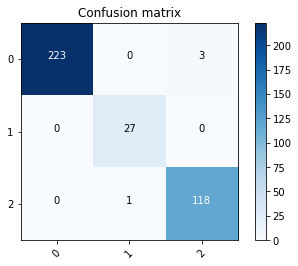

In [64]:
print("Decision Tree Z3")
y_pred36 = dt_classifier3.predict(x_test3)

cm = confusion_matrix(y_test3, y_pred36)
labels = ['0', '1', '2']

plot_confusion_matrix(cm, classes = labels)

print('Accuracy = ', accuracy_score(y_test3, y_pred36))

Random Forest Z3
Confusion matrix, without normalization
[[224   0   2]
 [  0  27   0]
 [  1   2 116]]
Accuracy =  0.9865591397849462


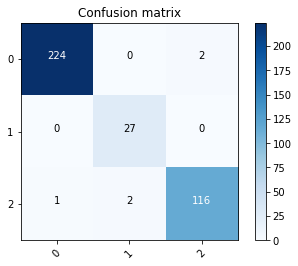

In [65]:
print("Random Forest Z3")
y_pred37 = rf_classifier3.predict(x_test3)

cm = confusion_matrix(y_test3, y_pred37)
labels = ['0', '1', '2']

plot_confusion_matrix(cm, classes = labels)

print('Accuracy = ', accuracy_score(y_test3, y_pred37))

### Accuracies

In [75]:
print('Logistic Regression = ', accuracy_score(y_test3, y_pred31))
print('K-Nearest Neighbors = ', accuracy_score(y_test3, y_pred32))
print('Linear Support Vector Machine = ', accuracy_score(y_test3, y_pred33))
print('RBF Kernel Support Vector Machine = ', accuracy_score(y_test3, y_pred34))
print('Naive Bayes = ', accuracy_score(y_test3, y_pred35))
print('Decision Tree = ', accuracy_score(y_test3, y_pred36))
print('Random Forest = ', accuracy_score(y_test3, y_pred37))

Logistic Regression =  0.8575268817204301
K-Nearest Neighbors =  0.9489247311827957
Linear Support Vector Machine =  0.989247311827957
RBF Kernel Support Vector Machine =  0.9220430107526881
Naive Bayes =  0.8682795698924731
Decision Tree =  0.9973118279569892
Random Forest =  0.9865591397849462


In [67]:
df2dz3 = dfz3.drop(['height','width','nonpothole_area'], axis=1)
df2dz3["cluster"] = y_pred1 = kmeans3.fit_predict(df2dz3)

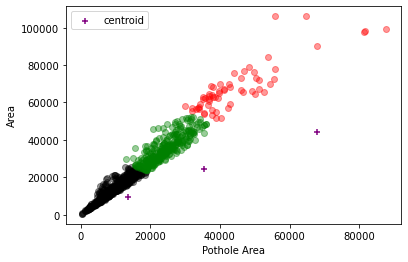

In [68]:
df31 = df2dz3[df2dz3.cluster==0]
df32 = df2dz3[df2dz3.cluster==1]
df33 = df2dz3[df2dz3.cluster==2]
plt.scatter(df31.pothole_area,df31.area,color='black',alpha=0.4)
plt.scatter(df32.pothole_area,df32.area,color='red',alpha=0.4)
plt.scatter(df33.pothole_area,df33.area,color='green',alpha=0.4)
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel("Pothole Area")
plt.ylabel("Area")
plt.legend()

In [69]:
dfz3.describe()

,height,width,area,pothole_area,nonpothole_area,cluster
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,141.246237,160.008602,24136.586022,16398.926882,7737.659140,0.704301
std,61.173830,60.393898,16866.241902,11359.076938,6335.443707,0.917292
min,16.000000,26.000000,416.000000,297.000000,119.000000,0.000000
25%,93.000000,114.000000,11819.500000,7876.750000,3174.500000,0.000000
50%,140.500000,152.000000,20167.500000,13939.000000,6038.500000,0.000000
75%,185.000000,196.000000,33099.000000,22620.000000,10167.500000,2.000000
max,339.000000,368.000000,106107.000000,87658.000000,50293.000000,2.000000


In [70]:
dfz3.drop(["cluster"],inplace=True, axis=1)
dfz3.head()

,height,width,area,pothole_area,nonpothole_area
0,225,290,65250,39803,25447
1,222,301,66822,41166,25656
2,209,317,66253,39794,26459
3,210,300,63000,38570,24430
4,185,282,52170,32183,19987


In [71]:
dfz3["cluster"] = np.where(
    dfz3['pothole_area'] <7800, 1,
        np.where(dfz3['pothole_area'] <14000, 2,
            np.where(dfz3['pothole_area'] <22000,3,
                4)))

dfz3.head()

,height,width,area,pothole_area,nonpothole_area,cluster
0,225,290,65250,39803,25447,4
1,222,301,66822,41166,25656,4
2,209,317,66253,39794,26459,4
3,210,300,63000,38570,24430,4
4,185,282,52170,32183,19987,4


In [72]:
x3 = dfz3.iloc[:,:-1].values
y3 = dfz3.iloc[:,-1]

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.4, random_state = 1)

In [73]:
lr_classifier3 = LogisticRegression()
knn_classifier3 = KNeighborsClassifier(n_neighbors = 5,p=2,metric = "minkowski")
svm_classifier3 = SVC(kernel = 'linear')
k_svm_classifier3 = SVC(kernel = 'rbf')
nb_classifier3 = GaussianNB()
dt_classifier3 = DecisionTreeClassifier(criterion = 'entropy')
rf_classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

lr_classifier3.fit(x_train3, y_train3)
knn_classifier3.fit(x_train3, y_train3)
svm_classifier3.fit(x_train3, y_train3)
k_svm_classifier3.fit(x_train3, y_train3)
nb_classifier3.fit(x_train3, y_train3)
dt_classifier3.fit(x_train3, y_train3)
rf_classifier3.fit(x_train3, y_train3)

/home/gufran/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [74]:
y_pred31 = lr_classifier3.predict(x_test3)
y_pred32 = knn_classifier3.predict(x_test3)
y_pred33 = svm_classifier3.predict(x_test3)
y_pred34 = k_svm_classifier3.predict(x_test3)
y_pred35 = nb_classifier3.predict(x_test3)
y_pred36 = dt_classifier3.predict(x_test3)
y_pred37 = rf_classifier3.predict(x_test3)

print('Logistic Regression = ', accuracy_score(y_test3, y_pred31))
print('K-Nearest Neighbors = ', accuracy_score(y_test3, y_pred32))
print('Linear Support Vector Machine = ', accuracy_score(y_test3, y_pred33))
print('RBF Kernel Support Vector Machine = ', accuracy_score(y_test3, y_pred34))
print('Naive Bayes = ', accuracy_score(y_test3, y_pred35))
print('Decision Tree = ', accuracy_score(y_test3, y_pred36))
print('Random Forest = ', accuracy_score(y_test3, y_pred37))

Logistic Regression =  0.8575268817204301
K-Nearest Neighbors =  0.9489247311827957
Linear Support Vector Machine =  0.989247311827957
RBF Kernel Support Vector Machine =  0.9220430107526881
Naive Bayes =  0.8682795698924731
Decision Tree =  0.9973118279569892
Random Forest =  0.9865591397849462
